In [1]:
import numpy as np
from MarkerGraph import *
import matplotlib.pyplot as plt
import os

In [2]:
if not os.path.exists("large_intestine_output"):
    os.makedirs("large_intestine_output")

In [3]:
with open('marker_list/LI46.txt') as f:
    li_markers = f.read().splitlines()

In [4]:
p0 = [ 'Hoechst', 'DRAQ5', 'CD127',
'CD4', 'CD44', 'CD49f', 'CD49a', 'CD123', 'CD19', 'aSMA',
'CD66', 'CD138', 'CK7', 'ITLN1', 'Cytokeratin', 'MUC1', 'MUC2', 'CD45', 'CD45RO',]

p1 = ['Hoechst', 'DRAQ5', 'CD127', 
'CD4', 'CD44', 'CD49f', 'CD49a', 'CD45', 'CD45RO', 'CD90',
'CD57', 'CD69', 'CD117', 'Ki67', 'CD7', 'CD8', 'CD11c', 'HLADR']

p2 = ['Hoechst',
'CD66', 'ITLN1', 'CD138', 'CK7', 'Cytokeratin', 'MUC1', 'SOX9', 'Vimentin', 'CD38', 'CD31',
'CD36', 'BCL2', 'CHGA', 'CD3', 'CD34', 'CDX2', 'CD161', 'CD15']

p3 = ['Hoechst', 
'SOX9', 'Vimentin', 'CD38', 'CD31', 'CD36', 'BCL2', 'CHGA', 'CD3', 'CD34', 'CDX2', 'CD161', 'CD15',
'CD206', 'CD21', 'CD56', 'CD68', 'CD16', 'CD163']

p4 = ['Hoechst', 'DRAQ5', 'CD127',  
'CD206', 'CD21', 'CD56', 'CD68', 'CD16', 'CD163',
'CD90','CD57', 'CD69', 'CD117', 'Ki67', 'CD7', 'CD8', 'CD11c', 'HLADR']

In [5]:
p0_idx = [li_markers.index(i) for i in p0]
p1_idx = [li_markers.index(i) for i in p1]
p2_idx = [li_markers.index(i) for i in p2]
p3_idx = [li_markers.index(i) for i in p3]
p4_idx = [li_markers.index(i) for i in p4]

p0_idx = sorted(p0_idx)
p1_idx = sorted(p1_idx)
p2_idx = sorted(p2_idx)
p3_idx = sorted(p3_idx)
p4_idx = sorted(p4_idx)

p_all = list(set(p0+p1+p2+p3+p4))
assert len(p_all) == 46

In [6]:
print('p0_idx =', p0_idx)
print('p1_idx =', p1_idx)
print('p2_idx =', p2_idx)
print('p3_idx =', p3_idx)
print('p4_idx =', p4_idx)

print(len(p0_idx))
print(len(p1_idx))
print(len(p2_idx))
print(len(p3_idx))
print(len(p4_idx))

p0_idx = [0, 2, 4, 6, 8, 12, 14, 17, 18, 19, 21, 23, 24, 27, 28, 29, 36, 39, 40]
p1_idx = [0, 1, 2, 6, 7, 8, 9, 12, 18, 22, 26, 29, 34, 36, 37, 38, 40, 42]
p2_idx = [0, 5, 10, 13, 14, 16, 17, 19, 20, 24, 25, 27, 30, 32, 33, 39, 41, 44, 45]
p3_idx = [0, 3, 5, 10, 11, 13, 15, 16, 20, 25, 30, 31, 32, 33, 35, 41, 43, 44, 45]
p4_idx = [0, 1, 2, 3, 6, 7, 9, 11, 15, 22, 26, 31, 34, 35, 37, 38, 42, 43]
19
18
19
19
18


In [7]:
init_mtx_basic = np.load("../single/large_intestine_output/mae_mtx_li_single.npy")
print(np.sum(np.min(init_mtx_basic + 100 * np.eye(46), axis=0)))
# crop out the initial matrix for each subpanel
p0_mtx = init_mtx_basic[p0_idx, :][:, p0_idx]
p1_mtx = init_mtx_basic[p1_idx, :][:, p1_idx]
p2_mtx = init_mtx_basic[p2_idx, :][:, p2_idx]
p3_mtx = init_mtx_basic[p3_idx, :][:, p3_idx]
p4_mtx = init_mtx_basic[p4_idx, :][:, p4_idx]

9.645606994628906


In [8]:
print((np.mean(p0_mtx) + np.mean(p1_mtx) + np.mean(p2_mtx) + np.mean(p3_mtx) + np.mean(p4_mtx))/5)

0.31211402075048156


In [9]:
num_markers = 46
subgraphs_idx = [p0_idx, p1_idx, p2_idx, p3_idx, p4_idx]
subgraphs_mtx = [p0_mtx, p1_mtx, p2_mtx, p3_mtx, p4_mtx]

In [10]:
out_final =  [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 21, 22, 23, 24, 25, 29, 30, 32, 33, 35, 37, 38, 39, 40, 42, 45]
regret_list = []
loss_list = []
node_costs = []

### initialize

In [11]:
G = MarkerGraph(subgraphs_idx, subgraphs_mtx, num_markers)
G.mtx

node_costs.append(np.sum(G.node_weights))

### update round 1

In [12]:
first_marker = G.select_first_input()

input: [6]
output: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
--------------------------------
training subgraph:  0 input:  [6] output:  [0, 2, 4, 8, 12, 14, 17, 18, 19, 21, 23, 24, 27, 28, 29, 36, 39, 40]
training subgraph:  1 input:  [6] output:  [0, 1, 2, 7, 8, 9, 12, 18, 22, 26, 29, 34, 36, 37, 38, 40, 42]
training subgraph:  4 input:  [6] output:  [0, 1, 2, 3, 7, 9, 11, 15, 22, 26, 31, 34, 35, 37, 38, 42, 43]


In [13]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp0_r1'  --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 --target_index 0 2 4 8 12 14 17 18 19 21 23 24 17 28 29 36 39 40 --in_dim 1 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp0_r1'  --path_output_dir 'large_intestine_output/r1_sp0_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 --target_index  0 2 4 8 12 14 17 18 19 21 23 24 17 28 29 36 39 40   --in_dim 1 --out_dim 18

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp1_r1'  --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 --target_index 0 1 2 7 8 9 12 18 22 26 29 34 36 37 38 40 42 --in_dim 1 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp1_r1'  --path_output_dir 'large_intestine_output/r1_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 --target_index 0 1 2 7 8 9 12 18 22 26 29 34 36 37 38 40 42  --in_dim 1 --out_dim 17

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp4_r1'  --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 --target_index 0 1 2 3 7 9 11 15 22 26 31 34 35 37 38 42 43  --in_dim 1 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp4_r1' --path_output_dir 'large_intestine_output/r1_sp4_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 --target_index  0 1 2 3 7 9 11 15 22 26 31 34 35 37 38 42 43  --in_dim 1 --out_dim 17

In [14]:
subgraph0_prediction = np.load('large_intestine_output/r1_sp0_val_mae.npy', allow_pickle=True) 
subgraph1_prediction = np.load('large_intestine_output/r1_sp1_val_mae.npy', allow_pickle=True) 
subgraph4_prediction = np.load('large_intestine_output/r1_sp4_val_mae.npy', allow_pickle=True) 

In [15]:
# update the subgraph matrix
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(4, subgraph4_prediction)

In [16]:
G.update()   
node_costs.append(np.sum(G.node_weights))

### update round 2

In [17]:
next_input = G.select_next_input()

input: [6, 43]
output: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  3 input:  [43] output:  [0, 3, 5, 10, 11, 13, 15, 16, 20, 25, 30, 31, 32, 33, 35, 41, 44, 45]
training subgraph:  4 input:  [6, 43] output:  [0, 1, 2, 3, 7, 9, 11, 15, 22, 26, 31, 34, 35, 37, 38, 42]
--out_drop_index:  16


In [18]:
# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'r2_sp3_val_vae.npy'  --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 43 --target_index 0 3 5 10 11 13 15 16 20 25 30 31 32 33 35 41 44 45 --in_dim 1 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_sp3_r2' --path_output_dir 'large_intestine_output/r2_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 --target_index  0 3 5 10 11 13 15 16 20 25 30 31 32 33 35 41 44 45   --in_dim 1 --out_dim 18

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp4_r2' --path_pretrain_dir 'test_models_LI_sp4_r1' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 16 --input_index 6 43 --target_index 0 1 2 3 7 9 11 15 22 26 31 34 35 37 38 42  --in_dim 2 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp4_r2'  --path_output_dir 'large_intestine_output/r2_sp4_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 43 --target_index  0 1 2 3 7 9 11 15 22 26 31 34 35 37 38 42  --in_dim 2 --out_dim 16

In [19]:
subgraph3_prediction = np.load('large_intestine_output/r2_sp3_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('large_intestine_output/r2_sp4_val_mae.npy', allow_pickle=True)

In [20]:
G.update_subgraph(3, subgraph3_prediction)
G.update_subgraph(4, subgraph4_prediction)

In [21]:
G.update()
node_costs.append(np.sum(G.node_weights)) 

### Round 3

In [22]:
next_input = G.select_next_input()

input: [6, 43, 19]
output: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [6, 19] output:  [0, 2, 4, 8, 12, 14, 17, 18, 21, 23, 24, 27, 28, 29, 36, 39, 40]
--out_drop_index:  8
training subgraph:  2 input:  [19] output:  [0, 5, 10, 13, 14, 16, 17, 20, 24, 25, 27, 30, 32, 33, 39, 41, 44, 45]


In [23]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_sp0_r3' --path_pretrain_dir 'test_models_LI_sp0_r1' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index  8 --input_index 6 19 --target_index 0 2 4 8 12 14 17 18 21 23 24 17 28 29 36 39 40 --in_dim 2 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp0_r3' --path_output_dir 'large_intestine_output/r3_sp0_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 19 --target_index  0 2 4 8 12 14 17 18 21 23 24 17 28 29 36 39 40   --in_dim 2 --out_dim 17

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r3'  --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 19 --target_index 0 5 10 13 14 16 17 20 24 25 27 30 32 33 39 41 44 45 --in_dim 1 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp2_r3' --path_output_dir 'large_intestine_output/r3_sp2_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 --target_index 0 5 10 13 14 16 17 20 24 25 27 30 32 33 39 41 44 45    --in_dim 1 --out_dim 18

In [24]:
subgraph0_prediction = np.load('large_intestine_output/r3_sp0_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('large_intestine_output/r3_sp2_val_mae.npy', allow_pickle=True)

In [25]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(2, subgraph2_prediction)

In [26]:
G.update()  
node_costs.append(np.sum(G.node_weights))

### Round4

In [27]:
next_input = G.select_next_input()

tie
candidates:  0 2 input: [6, 43, 19, 0]
output: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [6, 19, 0] output:  [2, 4, 8, 12, 14, 17, 18, 21, 23, 24, 27, 28, 29, 36, 39, 40]
--out_drop_index:  0
training subgraph:  1 input:  [6, 0] output:  [1, 2, 7, 8, 9, 12, 18, 22, 26, 29, 34, 36, 37, 38, 40, 42]
--out_drop_index:  0
training subgraph:  2 input:  [19, 0] output:  [5, 10, 13, 14, 16, 17, 20, 24, 25, 27, 30, 32, 33, 39, 41, 44, 45]
--out_drop_index:  0
training subgraph:  3 input:  [43, 0] output:  [3, 5, 10, 11, 13, 15, 16, 20, 25, 30, 31, 32, 33, 35, 41, 44, 45]
--out_drop_index:  0
training subgraph:  4 input:  [6, 43, 0] output:  [1, 2, 3, 7, 9, 11, 15, 22, 26, 31, 34, 35, 37, 38, 42]
--out_drop_index:  0


In [28]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp0_r4' --path_pretrain_dir 'test_models_LI_sp0_r2' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index  0 --input_index 6 19 0 --target_index 2 4 8 12 14 17 18 21 23 24 17 28 29 36 39 40 --in_dim 3 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp0_r4' --path_output_dir 'large_intestine_output/r4_sp0_val_mae'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 19 0 --target_index  2 4 8 12 14 17 18 21 23 24 17 28 29 36 39 40   --in_dim 3 --out_dim 16

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp1_r4'  --path_pretrain_dir 'test_models_LI_sp1_r1' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 0 --input_index 6 0 --target_index 1 2 7 8 9 12 18 22 26 29 34 36 37 38 40 42 --in_dim 2 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp1_r4'  --path_output_dir 'large_intestine_output/r4_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 0 --target_index 1 2 7 8 9 12 18 22 26 29 34 36 37 38 40 42  --in_dim 2 --out_dim 16

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r4'   --path_pretrain_dir 'test_models_LI_sp2_r3' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 0 --input_index 19 0 --target_index 5 10 13 14 16 17 20 24 25 27 30 32 33 39 41 44 45 --in_dim 2 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp2_r4' --path_output_dir 'large_intestine_output/r4_sp2_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 0 --target_index  5 10 13 14 16 17 20 24 25 27 30 32 33 39 41 44 45   --in_dim 2 --out_dim 17

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp3_r4'  --path_pretrain_dir 'test_models_LI_sp3_r2' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 0 --input_index 43 0 --target_index 3 5 10 11 13 15 16 20 25 30 31 32 33 35 41 44 45 --in_dim 2 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp3_r4' --path_output_dir 'large_intestine_output/r4_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 0 --target_index  3 5 10 11 13 15 16 20 25 30 31 32 33 35 41 44 45   --in_dim 2 --out_dim 17

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp4_r4' --path_pretrain_dir 'test_models_LI_sp4_r2' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 0 --input_index 6 43 0 --target_index 1 2 3 7 9 11 15 22 26 31 34 35 37 38 42  --in_dim 3 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp4_r4'  --path_output_dir 'large_intestine_output/r4_sp4_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 43 0 --target_index  1 2 3 7 9 11 15 22 26 31 34 35 37 38 42  --in_dim 3 --out_dim 15

In [29]:
subgraph0_prediction = np.load('large_intestine_output/r4_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('large_intestine_output/r4_sp1_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('large_intestine_output/r4_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('large_intestine_output/r4_sp3_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('large_intestine_output/r4_sp4_val_mae.npy', allow_pickle=True)

In [30]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)
G.update_subgraph(4, subgraph4_prediction)


In [31]:
G.update()  
node_costs.append(np.sum(G.node_weights))

### Round 5

In [32]:
next_input = G.select_next_input()
next_input

input: [6, 43, 19, 0, 18]
output: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [6, 19, 0, 18] output:  [2, 4, 8, 12, 14, 17, 21, 23, 24, 27, 28, 29, 36, 39, 40]
--out_drop_index:  6
training subgraph:  1 input:  [6, 0, 18] output:  [1, 2, 7, 8, 9, 12, 22, 26, 29, 34, 36, 37, 38, 40, 42]
--out_drop_index:  6


18

In [33]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp0_r5' --path_pretrain_dir 'test_models_LI_sp0_r4' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index  6 --input_index 6 19 0 18 --target_index 2 4 8 12 14 17 21 23 24 17 28 29 36 39 40 --in_dim 4 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp0_r5' --path_output_dir 'large_intestine_output/r5_sp0_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 19 0 18 --target_index  2 4 8 12 14 17 21 23 24 17 28 29 36 39 40   --in_dim 4 --out_dim 15

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp1_r5'  --path_pretrain_dir 'test_models_LI_sp1_r4' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 6 --input_index 6 0 18 --target_index 1 2 7 8 9 12 22 26 29 34 36 37 38 40 42 --in_dim 3 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp1_r5'  --path_output_dir 'large_intestine_output/r5_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 0 18 --target_index 1 2 7 8 9 12 22 26 29 34 36 37 38 40 42  --in_dim 3 --out_dim 15

In [34]:
subgraph0_prediction = np.load('large_intestine_output/r5_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('large_intestine_output/r5_sp1_val_mae.npy', allow_pickle=True)

In [35]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)

In [36]:
G.update()  
node_costs.append(np.sum(G.node_weights))

### Round6

In [37]:
next_input = G.select_next_input()
next_input

input: [6, 43, 19, 0, 18, 31]
output: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45]
--------------------------------
training subgraph:  3 input:  [43, 0, 31] output:  [3, 5, 10, 11, 13, 15, 16, 20, 25, 30, 32, 33, 35, 41, 44, 45]
--out_drop_index:  10
training subgraph:  4 input:  [6, 43, 0, 31] output:  [1, 2, 3, 7, 9, 11, 15, 22, 26, 34, 35, 37, 38, 42]
--out_drop_index:  9


31

In [38]:
# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp3_r6'  --path_pretrain_dir 'test_models_LI_sp3_r4' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 10 --input_index 43 0 31 --target_index 3 5 10 11 13 15 16 20 25 30 32 33 35 41 44 45 --in_dim 3 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp3_r6' --path_output_dir 'large_intestine_output/r6_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 0 31 --target_index  3 5 10 11 13 15 20 25 30 32 33 35 41 44 45   --in_dim 3 --out_dim 16

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp4_r6' --path_pretrain_dir 'test_models_LI_sp4_r4' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 9  --input_index 6 43 0 31 --target_index 1 2 3 7 9 11 15 22 26 34 35 37 38 42  --in_dim 4 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp4_r6'  --path_output_dir 'large_intestine_output/r6_sp4_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 43 01 31 --target_index  1 2 3 7 9 11 15 22 26 34 35 37 38 42  --in_dim 4 --out_dim 14

In [39]:
subgraph3_prediction = np.load('large_intestine_output/r6_sp3_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('large_intestine_output/r6_sp4_val_mae.npy', allow_pickle=True)

G.update_subgraph(3, subgraph3_prediction)
G.update_subgraph(4, subgraph4_prediction)

G.update()  
node_costs.append(np.sum(G.node_weights))

### Round7

In [40]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41]
output: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45]
--------------------------------
training subgraph:  2 input:  [19, 0, 41] output:  [5, 10, 13, 14, 16, 17, 20, 24, 25, 27, 30, 32, 33, 39, 44, 45]
--out_drop_index:  14
training subgraph:  3 input:  [43, 0, 31, 41] output:  [3, 5, 10, 11, 13, 15, 16, 20, 25, 30, 32, 33, 35, 44, 45]
--out_drop_index:  13


In [41]:
# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r7'   --path_pretrain_dir 'test_models_LI_sp2_r4' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 14 --input_index 19 0 41 --target_index 5 10 13 14 16 17 20 24 25 27 30 32 33 39 44 45 --in_dim 3 --out_dim 16
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_sp2_r7' --path_output_dir 'large_intestine_output/r7_sp2_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 0 41 --target_index  5 10 13 14 16 17 20 24 25 27 20 32 33 44 45   --in_dim 3 --out_dim 16

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp3_r7'  --path_pretrain_dir 'test_models_LI_sp3_r6' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 13 --input_index 43 0 31 41 --target_index 3 5 10 11 13 15 16 20 25 30 32 33 35 44 45 --in_dim 4 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_sp3_r7' --path_output_dir 'large_intestine_output/r7_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 0 31 41 --target_index  3 5 10 11 13 15 20 25 30 32 33 35 44 45   --in_dim 4 --out_dim 15

In [42]:
subgraph2_prediction = np.load('large_intestine_output/r7_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('large_intestine_output/r7_sp3_val_mae.npy', allow_pickle=True)

In [43]:
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)

In [44]:
G.update()  
node_costs.append(np.sum(G.node_weights))

### Round8

In [45]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45]
--------------------------------
training subgraph:  1 input:  [6, 0, 18, 7] output:  [1, 2, 8, 9, 12, 22, 26, 29, 34, 36, 37, 38, 40, 42]
--out_drop_index:  2
training subgraph:  4 input:  [6, 43, 0, 31, 7] output:  [1, 2, 3, 9, 11, 15, 22, 26, 34, 35, 37, 38, 42]
--out_drop_index:  3


In [46]:
# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp1_r8'  --path_pretrain_dir 'test_models_LI_sp1_r5' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 2 --input_index 6 0 18 7 --target_index 1 2 8 9 12 22 26 29 34 36 37 38 40 42 --in_dim 4 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_sp1_r8'  --path_output_dir 'large_intestine_output/r8_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 0 18 7 --target_index 1 2 8 9 12 22 26 29 34 36 37 38 40 42  --in_dim 4 --out_dim 14

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp4_r8' --path_pretrain_dir 'test_models_LI_sp4_r6' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 3  --input_index 6 43 0 31 7 --target_index 1 2 3 9 11 15 22 26 34 35 37 38 42  --in_dim 5 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_sp4_r8'  --path_output_dir 'large_intestine_output/r8_sp4_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 43 01 31 7 --target_index  1 2 3 9 11 15 22 26 34 35 37 38 42  --in_dim 5 --out_dim 13

In [47]:
subgraph1_prediction = np.load('large_intestine_output/r8_sp1_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('large_intestine_output/r8_sp4_val_mae.npy', allow_pickle=True)

In [48]:
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(4, subgraph4_prediction)

In [49]:
G.update()  
node_costs.append(np.sum(G.node_weights))

### Round 9

In [50]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45]
--------------------------------
training subgraph:  0 input:  [6, 19, 0, 18, 28] output:  [2, 4, 8, 12, 14, 17, 21, 23, 24, 27, 29, 36, 39, 40]
--out_drop_index:  10


In [51]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp0_r9' --path_pretrain_dir 'test_models_LI_sp0_r5' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 10 --input_index 6 19 0 18 28 --target_index 2 4 8 12 14 17 21 23 24 27 29 36 39 40 --in_dim 5 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp0_r9' --path_output_dir 'large_intestine_output/r9_sp0_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 19 0 18 28 --target_index  2 4 8 12 14 17 21 23 24 27 29 36 39 40   --in_dim 5 --out_dim 14

In [52]:
subgraph0_prediction = np.load('large_intestine_output/r9_sp0_val_mae.npy', allow_pickle=True)

In [53]:
G.update_subgraph(0, subgraph0_prediction)

In [54]:
G.update()  
node_costs.append(np.sum(G.node_weights))

### Round10

In [55]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 45]
--------------------------------
training subgraph:  2 input:  [19, 0, 41, 44] output:  [5, 10, 13, 14, 16, 17, 20, 24, 25, 27, 30, 32, 33, 39, 45]
--out_drop_index:  14
training subgraph:  3 input:  [43, 0, 31, 41, 44] output:  [3, 5, 10, 11, 13, 15, 16, 20, 25, 30, 32, 33, 35, 45]
--out_drop_index:  13


In [56]:
# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r10'   --path_pretrain_dir 'test_models_LI_sp2_r7' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 14 --input_index 19 0 41 44 --target_index 5 10 13 14 16 17 20 24 25 27 30 32 33 39 45 --in_dim 4 --out_dim 15
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp2_r10' --path_output_dir 'large_intestine_output/r10_sp2_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 0 41 44 --target_index  5 10 13 14 16 17 20 24 25 27 30 32 33 39 45   --in_dim 4 --out_dim 15

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp3_r10'  --path_pretrain_dir 'test_models_LI_sp3_r7' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 13 --input_index 43 0 31 41 44 --target_index 3 5 10 11 13 15 16 20 25 30 32 33 35 45 --in_dim 5 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp3_r10' --path_output_dir 'large_intestine_output/r10_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 0 31 41 44 --target_index  3 5 10 11 13 15 20 25 30 32 33 35 45   --in_dim 5 --out_dim 14

In [57]:
subgraph2_prediction = np.load('large_intestine_output/r10_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('large_intestine_output/r10_sp3_val_mae.npy', allow_pickle=True)

In [58]:
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)

In [59]:
G.update()  
node_costs.append(np.sum(G.node_weights))

### Round 11

In [60]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 35, 36, 37, 38, 39, 40, 42, 45]
--------------------------------
training subgraph:  1 input:  [6, 0, 18, 7, 34] output:  [1, 2, 8, 9, 12, 22, 26, 29, 36, 37, 38, 40, 42]
--out_drop_index:  8
training subgraph:  4 input:  [6, 43, 0, 31, 7, 34] output:  [1, 2, 3, 9, 11, 15, 22, 26, 35, 37, 38, 42]
--out_drop_index:  8


In [61]:
# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp1_r11'  --path_pretrain_dir 'test_models_LI_sp1_r8' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 8 --input_index 6 0 18 7 34 --target_index 1 2 8 9 12 22 26 29 36 37 38 40 42 --in_dim 5 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp1_r11'  --path_output_dir 'large_intestine_output/r11_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 0 18 7 34 --target_index 1 2 8 9 12 22 26 29 36 37 38 40 42  --in_dim 5 --out_dim 13

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp4_r11' --path_pretrain_dir 'test_models_LI_sp4_r8' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 8 --input_index 6 43 0 31 7 34 --target_index 1 2 3 9 11 15 22 26 35 37 38 42  --in_dim 6 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp4_r11'  --path_output_dir 'large_intestine_output/r11_sp4_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 43 01 31 7 34 --target_index  1 2 3 9 11 15 22 26 35 37 38 42  --in_dim 6 --out_dim 12

In [62]:
subgraph1_prediction = np.load('large_intestine_output/r11_sp1_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('large_intestine_output/r11_sp4_val_mae.npy', allow_pickle=True)

In [63]:
G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(4, subgraph4_prediction)

In [64]:
G.update()  
node_costs.append(np.sum(G.node_weights))

### Round12

In [65]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34, 27]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 29, 30, 32, 33, 35, 36, 37, 38, 39, 40, 42, 45]
--------------------------------
training subgraph:  0 input:  [6, 19, 0, 18, 28, 27] output:  [2, 4, 8, 12, 14, 17, 21, 23, 24, 29, 36, 39, 40]
--out_drop_index:  9
training subgraph:  2 input:  [19, 0, 41, 44, 27] output:  [5, 10, 13, 14, 16, 17, 20, 24, 25, 30, 32, 33, 39, 45]
--out_drop_index:  9


In [66]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp0_r12' --path_pretrain_dir 'test_models_LI_sp0_r9' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 9 --input_index 6 19 0 18 28 27 --target_index 2 4 8 12 14 17 21 23 24 29 36 39 40 --in_dim 6 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp0_r12' --path_output_dir 'large_intestine_output/r12_sp0_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 19 0 18 28 27 --target_index  2 4 8 12 14 17 21 23 24 29 36 39 40   --in_dim 6 --out_dim 13

# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r12'   --path_pretrain_dir 'test_models_LI_sp2_r10' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 9 --input_index 19 0 41 44 27 --target_index 5 10 13 14 16 17 20 24 25 30 32 33 39 45 --in_dim 5 --out_dim 14
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp2_r12' --path_output_dir 'large_intestine_output/r12_sp2_val_mae.npyy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 0 41 44 27 --target_index  5 10 13 14 16 17 20 24 25 30 32 33 39 45   --in_dim 5 --out_dim 14


In [67]:
subgraph0_prediction = np.load('large_intestine_output/r12_sp0_val_mae.npy', allow_pickle=True)
subgraph2_prediction = np.load('large_intestine_output/r12_sp2_val_mae.npy', allow_pickle=True)

In [68]:
G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(2, subgraph2_prediction)

In [69]:
G.update()
node_costs.append(np.sum(G.node_weights))

### Round 13

In [70]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34, 27, 20]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 29, 30, 32, 33, 35, 36, 37, 38, 39, 40, 42, 45]
--------------------------------
training subgraph:  2 input:  [19, 0, 41, 44, 27, 20] output:  [5, 10, 13, 14, 16, 17, 24, 25, 30, 32, 33, 39, 45]
--out_drop_index:  6
training subgraph:  3 input:  [43, 0, 31, 41, 44, 20] output:  [3, 5, 10, 11, 13, 15, 16, 25, 30, 32, 33, 35, 45]
--out_drop_index:  7


In [71]:
# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r13'   --path_pretrain_dir 'test_models_LI_sp2_r12' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 6 --input_index 19 0 41 44 27 20 --target_index 5 10 13 14 16 17 24 25 30 32 33 39 45 --in_dim 6 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp2_r13' --path_output_dir 'large_intestine_output/r13_sp2_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 0 41 44 27 20 --target_index  5 10 13 14 16 17 24 25 30 32 33 39 45   --in_dim 6 --out_dim 13

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp3_r13'  --path_pretrain_dir 'test_models_LI_sp3_r10' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 7 --input_index 43 0 31 41 44 20 --target_index 3 5 10 11 13 15 16 25 30 32 33 35 45 --in_dim 6 --out_dim 13
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp3_r13' --path_output_dir 'large_intestine_output/r13_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 0 31 41 44 20 --target_index  3 5 10 11 13 15 25 30 32 33 35 45   --in_dim 6 --out_dim 13

In [72]:
subgraph2_prediction = np.load('large_intestine_output/r13_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('large_intestine_output/r13_sp3_val_mae.npy', allow_pickle=True)

In [73]:
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)

In [74]:
G.update()
node_costs.append(np.sum(G.node_weights))

### Round 14

In [75]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34, 27, 20, 25]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 32, 33, 35, 36, 37, 38, 39, 40, 42, 45]
--------------------------------
training subgraph:  2 input:  [19, 0, 41, 44, 27, 20, 25] output:  [5, 10, 13, 14, 16, 17, 24, 30, 32, 33, 39, 45]
--out_drop_index:  7
training subgraph:  3 input:  [43, 0, 31, 41, 44, 20, 25] output:  [3, 5, 10, 11, 13, 15, 16, 30, 32, 33, 35, 45]
--out_drop_index:  7


In [76]:
# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r14'   --path_pretrain_dir 'test_models_LI_sp2_r13' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 7 --input_index 19 0 41 44 27 20 25 --target_index 5 10 13 14 16 17 24 30 32 33 39 45 --in_dim 7 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp2_r14' --path_output_dir 'large_intestine_output/r14_sp2_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 0 41 44 27 20 25 --target_index  5 10 13 14 16 17 24 30 32 33 39 45   --in_dim 7 --out_dim 12

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp3_r14'  --path_pretrain_dir 'test_models_LI_sp3_r13' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 7 --input_index 43 0 31 41 44 20 25 --target_index 3 5 10 11 13 15 16 30 32 33 35 45 --in_dim 7 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp3_r14' --path_output_dir 'large_intestine_output/r14_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 0 31 41 44 20 25 --target_index  3 5 10 11 13 15 30 32 33 35 45   --in_dim 7 --out_dim 12

In [77]:
subgraph2_prediction = np.load('large_intestine_output/r14_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('large_intestine_output/r14_sp3_val_mae.npy', allow_pickle=True)

In [78]:
G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)

In [79]:
G.update()
node_costs.append(np.sum(G.node_weights))

###  Round 15

In [80]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34, 27, 20, 25, 36]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 32, 33, 35, 37, 38, 39, 40, 42, 45]
--------------------------------
training subgraph:  0 input:  [6, 19, 0, 18, 28, 27, 36] output:  [2, 4, 8, 12, 14, 17, 21, 23, 24, 29, 39, 40]
--out_drop_index:  10
training subgraph:  1 input:  [6, 0, 18, 7, 34, 36] output:  [1, 2, 8, 9, 12, 22, 26, 29, 37, 38, 40, 42]
--out_drop_index:  8


In [81]:
# train the net in subpanel0
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp0_r15' --path_pretrain_dir 'test_models_LI_sp0_r12' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 10 --input_index 6 19 0 18 28 27 36 --target_index 2 4 8 12 14 17 21 23 24 29 39 40 --in_dim 7 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp0_r15' --path_output_dir 'large_intestine_output/r15_sp0_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 19 0 18 28 27 36 --target_index  2 4 8 12 14 17 21 23 24 29 39 40   --in_dim 7 --out_dim 12

# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp1_r11'  --path_pretrain_dir 'test_models_LI_sp1_r8' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 8 --input_index 6 0 18 7 34 36 --target_index 1 2 8 9 12 22 26 29 37 38 40 42 --in_dim 6 --out_dim 12
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp1_r15'  --path_output_dir 'large_intestine_output/r15_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 0 18 7 34 36 --target_index 1 2 8 9 12 22 26 29 37 38 40 42  --in_dim 6 --out_dim 12

In [82]:
subgraph0_prediction = np.load('large_intestine_output/r15_sp0_val_mae.npy', allow_pickle=True)
subgraph1_prediction = np.load('large_intestine_output/r15_sp1_val_mae.npy', allow_pickle=True)

G.update_subgraph(0, subgraph0_prediction)
G.update_subgraph(1, subgraph1_prediction)

G.update()
node_costs.append(np.sum(G.node_weights))

### Round 16

In [83]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34, 27, 20, 25, 36, 37]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 32, 33, 35, 38, 39, 40, 42, 45]
--------------------------------
training subgraph:  1 input:  [6, 0, 18, 7, 34, 36, 37] output:  [1, 2, 8, 9, 12, 22, 26, 29, 38, 40, 42]
--out_drop_index:  8
training subgraph:  4 input:  [6, 43, 0, 31, 7, 34, 37] output:  [1, 2, 3, 9, 11, 15, 22, 26, 35, 38, 42]
--out_drop_index:  9


In [84]:
# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp1_r16'  --path_pretrain_dir 'test_models_LI_sp1_r11' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 8 --input_index 6 0 18 7 34 36 37 --target_index 1 2 8 9 12 22 26 29 38 40 42 --in_dim 7 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp1_r16'  --path_output_dir 'large_intestine_output/r16_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 0 18 7 34 36 37 --target_index 1 2 8 9 12 22 26 29 38 40 42  --in_dim 7 --out_dim 11

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp4_r16' --path_pretrain_dir 'test_models_LI_sp4_r11' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 9 --input_index 6 43 0 31 7 34 37 --target_index 1 2 3 9 11 15 22 26 35 38 42  --in_dim 7 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp4_r16'  --path_output_dir 'large_intestine_output/r16_sp4_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 43 01 31 7 34 37 --target_index  1 2 3 9 11 15 22 26 35 38 42  --in_dim 7 --out_dim 11

In [85]:
subgraph1_prediction = np.load('large_intestine_output/r16_sp1_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('large_intestine_output/r16_sp4_val_mae.npy', allow_pickle=True)

G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(4, subgraph4_prediction)

G.update()
node_costs.append(np.sum(G.node_weights))

### Round 17


In [86]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34, 27, 20, 25, 36, 37, 38]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 32, 33, 35, 39, 40, 42, 45]
--------------------------------
training subgraph:  1 input:  [6, 0, 18, 7, 34, 36, 37, 38] output:  [1, 2, 8, 9, 12, 22, 26, 29, 40, 42]
--out_drop_index:  8
training subgraph:  4 input:  [6, 43, 0, 31, 7, 34, 37, 38] output:  [1, 2, 3, 9, 11, 15, 22, 26, 35, 42]
--out_drop_index:  9


In [87]:
# train the net in subpanel1
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp1_r17'  --path_pretrain_dir 'test_models_LI_sp1_r16' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 8 --input_index 6 0 18 7 34 36 37 38 --target_index 1 2 8 9 12 22 26 29 40 42 --in_dim 8 --out_dim 10
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp1_r16'  --path_output_dir 'large_intestine_output/r17_sp1_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 6 0 18 7 34 36 37 38 --target_index 1 2 8 9 12 22 26 29 40 42  --in_dim 8 --out_dim 10

# train the net in subpanel4
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp4_r16' --path_pretrain_dir 'test_models_LI_sp4_r11' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 9 --input_index 6 43 0 31 7 34 37 38 --target_index 1 2 3 9 11 15 22 26 35 42  --in_dim 8 --out_dim 10
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp4_r16'  --path_output_dir 'large_intestine_output/r17_sp4_val_mae.npy' --path_dataset_val_csv "../csv/val_path_LI.csv" --input_index 6 43 01 31 7 34 37 38  --target_index  1 2 3 9 11 15 22 26 35 42  --in_dim 8 --out_dim 10

In [88]:
subgraph1_prediction = np.load('large_intestine_output/r17_sp1_val_mae.npy', allow_pickle=True)
subgraph4_prediction = np.load('large_intestine_output/r17_sp4_val_mae.npy', allow_pickle=True)

G.update_subgraph(1, subgraph1_prediction)
G.update_subgraph(4, subgraph4_prediction)

G.update()
node_costs.append(np.sum(G.node_weights))

### Round 18

In [89]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34, 27, 20, 25, 36, 37, 38, 13]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 32, 33, 35, 39, 40, 42, 45]
--------------------------------
training subgraph:  2 input:  [19, 0, 41, 44, 27, 20, 25, 13] output:  [5, 10, 14, 16, 17, 24, 30, 32, 33, 39, 45]
--out_drop_index:  2
training subgraph:  3 input:  [43, 0, 31, 41, 44, 20, 25, 13] output:  [3, 5, 10, 11, 15, 16, 30, 32, 33, 35, 45]
--out_drop_index:  4


In [90]:
# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r18'   --path_pretrain_dir 'test_models_LI_sp2_r14' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 2 --input_index 19 0 41 44 27 20 25 13 --target_index 5 10 14 16 17 24 30 32 33 39 45 --in_dim 8 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp2_r18' --path_output_dir 'large_intestine_output/r18_sp2_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 0 41 44 27 20 25 13 --target_index  5 10 14 16 17 24 30 32 33 39 45   --in_dim 8 --out_dim 11

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp3_r18'  --path_pretrain_dir 'test_models_LI_sp3_r14' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 4 --input_index 43 0 31 41 44 20 25 13 --target_index 3 5 10 11 15 16 30 32 33 35 45 --in_dim 8 --out_dim 11
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp3_r18' --path_output_dir 'large_intestine_output/r18_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 0 31 41 44 20 25 13 --target_index  3 5 10 11 15 30 32 33 35 45   --in_dim 8 --out_dim 11

In [91]:
subgraph2_prediction = np.load('large_intestine_output/r18_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('large_intestine_output/r18_sp3_val_mae.npy', allow_pickle=True)

G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)

G.update()
node_costs.append(np.sum(G.node_weights))

### Round 19

In [92]:
next_input = G.select_next_input()

input: [6, 43, 19, 0, 18, 31, 41, 7, 28, 44, 34, 27, 20, 25, 36, 37, 38, 13, 32]
output: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 33, 35, 39, 40, 42, 45]
--------------------------------
training subgraph:  2 input:  [19, 0, 41, 44, 27, 20, 25, 13, 32] output:  [5, 10, 14, 16, 17, 24, 30, 33, 39, 45]
--out_drop_index:  7
training subgraph:  3 input:  [43, 0, 31, 41, 44, 20, 25, 13, 32] output:  [3, 5, 10, 11, 15, 16, 30, 33, 35, 45]
--out_drop_index:  7


In [93]:
# train the net in subpanel2
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp2_r19'   --path_pretrain_dir 'test_models_LI_sp2_r18' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 7 --input_index 19 0 41 44 27 20 25 13 32 --target_index 5 10 14 16 17 24 30 33 39 45 --in_dim 9 --out_dim 10
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp2_r19' --path_output_dir 'large_intestine_output/r19_sp2_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 19 0 41 44 27 20 25 13 32 --target_index  5 10 14 16 17 24 30 33 39 45   --in_dim 9 --out_dim 10

# train the net in subpanel3
# !python ../train_net/train_model.py --transform_signal normalize --drop_patch_threshold -13000 --n_iter 3200  --interval_save 200 --iter_checkpoint 200 --path_run_dir 'test_models_LI_sp3_r19'  --path_pretrain_dir 'test_models_LI_sp3_r18' --path_dataset_csv "../csv/train_path_LI.csv" --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 7 --input_index 43 0 31 41 44 20 25 13 32 --target_index 3 5 10 11 15 16 30 33 35 45 --in_dim 9 --out_dim 10
# !python ../train_net/validation.py --transform_signal normalize --n_iter 3200 --path_run_dir 'test_models_LI_sp3_r19' --path_output_dir 'large_intestine_output/r19_sp3_val_mae.npy'  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 43 0 31 41 44 20 25 13 32 --target_index  3 5 10 11 15 30 33 35 45   --in_dim 9 --out_dim 10

In [94]:
subgraph2_prediction = np.load('large_intestine_output/r19_sp2_val_mae.npy', allow_pickle=True)
subgraph3_prediction = np.load('large_intestine_output/r19_sp3_val_mae.npy', allow_pickle=True)

G.update_subgraph(2, subgraph2_prediction)
G.update_subgraph(3, subgraph3_prediction)

G.update()
node_costs.append(np.sum(G.node_weights))

In [95]:
print(node_costs)

[0.0, 13.189843092113733, 10.990895219147205, 10.081493735313416, 9.34431010733048, 8.673479720950127, 8.240719821304083, 7.708132013678551, 7.257667645812035, 6.89984018355608, 6.563436947762966, 6.24884770065546, 5.794893376529217, 5.482682600617409, 5.231026031076908, 5.0023205280303955, 4.7410110011696815, 4.491450190544128, 4.258732549846172, 4.056373756378889]


In [96]:
import numpy as np
# np.save("li_mtx.npy", G.mtx)
li_mtx = np.load("li_mtx.npy")

with open('marker_list/LI46.txt') as f:
    li_markers = f.read().splitlines()

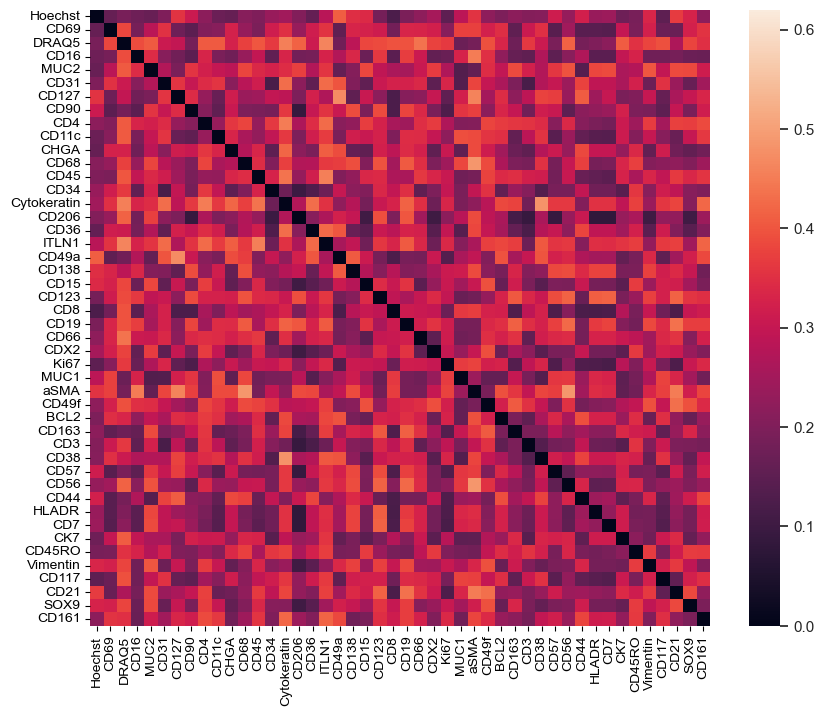

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_theme()
df = pd.DataFrame(li_mtx)
p = sns.heatmap(df, xticklabels=True, yticklabels=True, vmin=0, vmax = 0.62)
p.set_xticklabels(li_markers, rotation=90)
p.set_yticklabels(li_markers, rotation=0)
plt.show()